In [1]:
#dependencies 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import requests 
import time 

#import API Keys 
from api_key import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys}&q=city"
print(query_url)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





http://api.openweathermap.org/data/2.5/weather?appid=bab0ce301c736d4083e592382b2b8331&q=city


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

581

In [4]:

City= []
Cloudiness= []
Country= []
Date= []
Humidity= []
lat= []
lng= []
Max_Temp= []
Wind_Speed= []

WeatherPy_df =pd.DataFrame(columns= ["City","Cloudiness", "Country",
                                    "Date", "Lat", "Lng",
                                      "Max Temp", "Wind Speed"])
WeatherPy_df

,City,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind Speed


In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=bab0ce301c736d4083e592382b2b8331&q="
i = 0

print("Beginning Data Revival")
print("------------------------")

for city in cities:    
    city_pd = requests.get(url + city)
    city_data = city_pd.json()

    if (city_data['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        #print(city_data.url)

        WeatherPy_df.loc[i,'City'] = city
        WeatherPy_df.loc[i,'Cloudiness'] = city_data['clouds']['all']
        WeatherPy_df.loc[i,'Country'] = city_data['sys']['country']
        WeatherPy_df.loc[i,'Date'] = city_data["dt"] 
        WeatherPy_df.loc[i,'Humidity'] = city_data['main']['humidity']
        WeatherPy_df.loc[i,'Lat'] = city_data['coord']['lat']
        WeatherPy_df.loc[i,'Lng'] = city_data['coord']['lon']
        WeatherPy_df.loc[i,'Max Temp'] = city_data['main']['temp_max']
        WeatherPy_df.loc[i,'Wind Speed'] = city_data['wind']['speed']
        
# Make an exception incase link is invalid
    else:
        print('City not found. Skipping')
        
# Make a notification to alert the completion of the task        
print("-"*20)
print("Data Retrieval Complete")      
print("-"*20)

Beginning Data Revival
------------------------
Processing Record 1 | baghdad
Processing Record 2 | busselton
Processing Record 3 | komsomolskiy
Processing Record 4 | adrar
Processing Record 5 | apac
Processing Record 6 | mataura
Processing Record 7 | atuona
Processing Record 8 | okmulgee
Processing Record 9 | petatlan
Processing Record 10 | tasiilaq
Processing Record 11 | kapaa
Processing Record 12 | barrow
Processing Record 13 | mar del plata
City not found. Skipping
Processing Record 14 | la paz
Processing Record 15 | namatanai
Processing Record 16 | kavieng
Processing Record 17 | new norfolk
Processing Record 18 | cuautepec
Processing Record 19 | khatanga
Processing Record 20 | sterling
Processing Record 21 | jaunjelgava
Processing Record 22 | butaritari
Processing Record 23 | zemio
Processing Record 24 | mount gambier
Processing Record 25 | constitucion
Processing Record 26 | hobart
Processing Record 27 | puerto ayora
City not found. Skipping
Processing Record 28 | gornoye loo
Pro

Processing Record 226 | sao joao do paraiso
Processing Record 227 | conde
Processing Record 228 | karratha
Processing Record 229 | panji
Processing Record 230 | bubaque
Processing Record 231 | la huacana
Processing Record 232 | rawson
Processing Record 233 | bulgan
Processing Record 234 | dwarka
Processing Record 235 | tambacounda
Processing Record 236 | nicoya
Processing Record 237 | bandarbeyla
Processing Record 238 | san rafael
Processing Record 239 | kargasok
Processing Record 240 | khasan
Processing Record 241 | razdolinsk
Processing Record 242 | tshikapa
Processing Record 243 | wanning
Processing Record 244 | kysyl-syr
Processing Record 245 | cherskiy
City not found. Skipping
Processing Record 246 | te anau
City not found. Skipping
Processing Record 247 | faya
Processing Record 248 | boblingen
City not found. Skipping
Processing Record 249 | izhma
Processing Record 250 | kem
Processing Record 251 | iguape
Processing Record 252 | khorixas
City not found. Skipping
City not found. S

City not found. Skipping
Processing Record 449 | morshansk
Processing Record 450 | benghazi
Processing Record 451 | kortkeros
Processing Record 452 | surt
Processing Record 453 | luancheng
Processing Record 454 | yumen
Processing Record 455 | denpasar
Processing Record 456 | rwamagana
Processing Record 457 | san cosme y damian
Processing Record 458 | jacareacanga
Processing Record 459 | muisne
Processing Record 460 | kloulklubed
Processing Record 461 | strezhevoy
Processing Record 462 | bonanza
Processing Record 463 | nyurba
Processing Record 464 | sarkand
Processing Record 465 | ponta delgada
Processing Record 466 | san juan
Processing Record 467 | pitimbu
Processing Record 468 | eregli
Processing Record 469 | honiara
Processing Record 470 | hay river
Processing Record 471 | leme
Processing Record 472 | dhidhdhoo
Processing Record 473 | bukachacha
City not found. Skipping
Processing Record 474 | coruripe
Processing Record 475 | lorengau
Processing Record 476 | umea
Processing Record 4

In [22]:
WeatherPy_df.count()

City          581
Cloudiness    581
Country       581
Date          581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
Humidity      581
dtype: int64

In [59]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)




# Display the city weather data frame
WeatherPy_df.head(10)

#figure out the max and min
#WeatherPy_df.min()
#WeatherPy_df.max()

,City,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind Speed,Humidity
1,baghdad,0.0,IQ,1.549336e+09,33.3,44.38,276.15,2.6,93.0
2,busselton,56.0,AU,1.549337e+09,-33.64,115.35,297.986,3.86,76.0
3,komsomolskiy,0.0,RU,1.549337e+09,67.55,63.78,234.886,1.36,0.0
4,adrar,0.0,DZ,1.549336e+09,27.87,-0.29,277.15,2.6,41.0
5,apac,24.0,UG,1.549337e+09,1.98,32.53,294.161,5.26,64.0
6,mataura,12.0,NZ,1.549337e+09,-46.19,168.86,292.361,11.46,61.0
7,atuona,68.0,PF,1.549337e+09,-9.8,-139.03,300.786,7.71,100.0
8,okmulgee,1.0,US,1.549335e+09,35.62,-95.96,279.85,5.7,92.0
9,petatlan,5.0,MX,1.549335e+09,17.52,-101.27,296.15,1.46,83.0
10,tasiilaq,24.0,GL,1.549335e+09,65.61,-37.64,268.15,13.4,45.0


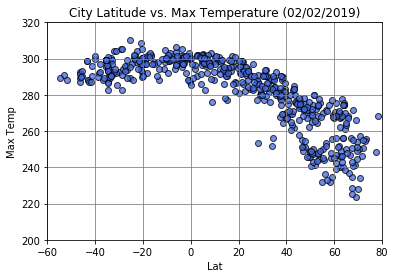

In [58]:
#Latitude Vs Temperature 

# Build Scatter Plot
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Max Temp'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(200, 320)
plt.xlim(-60, 80)

plt.title("City Latitude vs. Max Temperature (02/02/2019)")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()



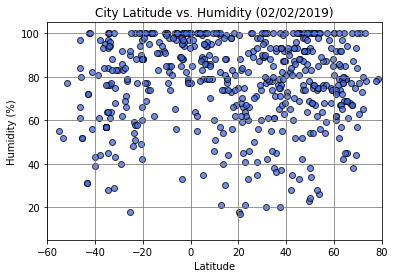

In [60]:
#Humidity Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Humidity'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(5, 105)
plt.xlim(-60, 80)
# Set titles
plt.title("City Latitude vs. Humidity (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()



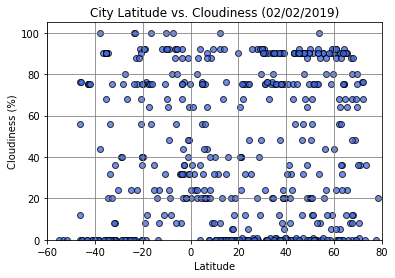

In [61]:
#Cloudiness Vs. Latitude 
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Cloudiness'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(0, 105)
plt.xlim(-60, 80)
# Set titles
plt.title("City Latitude vs. Cloudiness (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()



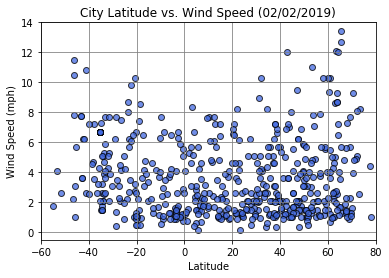

In [54]:
#Wind Speed Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Wind Speed'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(-.5, 14)
plt.xlim(-60, 80)
# Set titles
plt.title("City Latitude vs. Wind Speed (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()